In [1]:
from root import *
# Con esto me traigo todo lo que inicialice en root.py y me evito repetir codigo

### Subscription Type VS Trip Duration

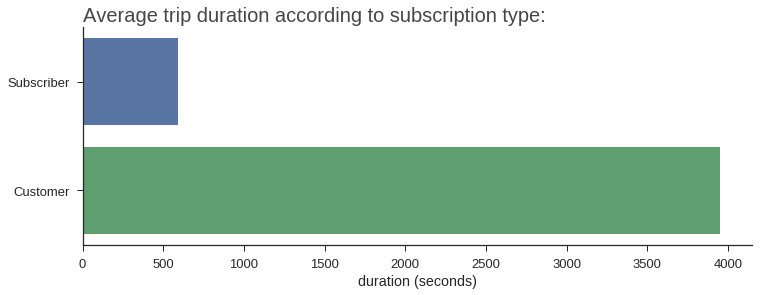

In [2]:
result = dfTrip[['duration', 'start_date', 'end_date', 'subscription_type']]\
        .sort_values(by=['start_date', 'end_date'])\
        .groupby(by=['subscription_type'])\
        .agg('mean').reset_index()
        
plt.figure(figsize=(12,4))

sns.set(font_scale=1.30)
sns.set_style('ticks')

bars = sns.barplot(x='duration',\
                   y='subscription_type',\
                   order=['Subscriber', 'Customer'],\
                   data=result)

sns.despine()

bars.set(xlabel='duration (seconds)',\
         ylabel='');

bars.set_title('Average trip duration according to subscription type:', size=20, loc='left', alpha=0.85);
plt.show()

# Para guardar la visualización al File System
# igual no funca bien... trunca la parte de abajo. Mejor hacerle un print.
# fig = bars.get_figure()
# fig.savefig('../Visualizations/01.png')



### Recorto viajes menores a 2 minutos y mayores a 8 horas
Existen viajes extremadamente largos (200 días por ejemplo) que alteran los promedios de los viajes al igual que viajes extremadamente cortos que no representan casos habituales en el set de datos y perjudican a la comprensión y generalización de los mismos.

**De hecho en la página oficial el uso extendido de las bicicletas es desalentado para este servicio:**
> *If you plan on using a bicycle for an extended period of time,
> we encourage you to rent a bike at a local bike shop or 
> rental business.*

In [3]:
dfTripCut = dfTrip[(dfTrip.duration >= 60*2) & (dfTrip.duration <= 8*3600)]
print "\nAntes del recorte:", len(dfTrip), "\nDespués del recorte:", len(dfTripCut), "\n"


Antes del recorte: 669959 
Después del recorte: 662757 



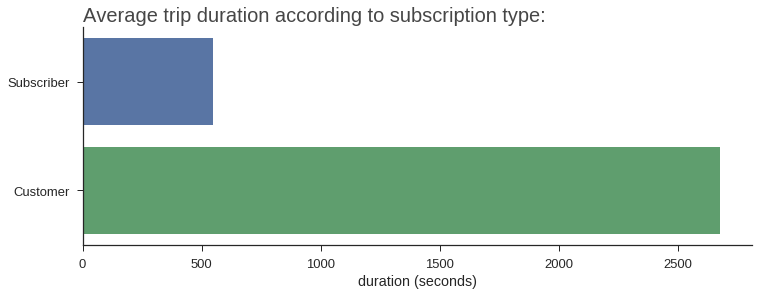

In [4]:
result = dfTripCut[['duration', 'start_date', 'end_date', 'subscription_type']]\
        .sort_values(by=['start_date', 'end_date'])\
        .groupby(by=['subscription_type'])\
        .agg('mean').reset_index()
        
plt.figure(figsize=(12,4))

sns.set(font_scale=1.30)
sns.set_style('ticks')

bars = sns.barplot(x='duration',\
                   y='subscription_type',\
                   order=['Subscriber', 'Customer'],\
                   data=result)

sns.despine()

bars.set(xlabel='duration (seconds)',\
         ylabel='');

bars.set_title('Average trip duration according to subscription type:', size=20, loc='left', alpha=0.85);
plt.show()

Se puede apreciar que los valores de los **suscriptos** se mantienen iguales mientras que las duraciones de los viajes de los **clientes** rondan los 45 minutos, en oposición al gráfico anterior en donde éstos últimos sobrepasaban la hora.

Esto cobra un sentido más trascendente cuando se lo observa a la par con los precios listados en la página oficial:  
[SF Bay Area Bike Share](https://www.bayareabikeshare.com/pricing "Bay Area Bike Pricing") en donde se puede observar que a partir de los 30+ minutos de viaje, comienzan a haber pequeños recargos y luego de los 60+ minutos de viaje los recargos aumentan. Por lo que tiene sentido que en promedio los viajes no se excedan de los 60 minutos.